# Analyzing the Efficiency of Using Multiple Running Backs in the NFL

[Bleacherreport](https://bleacherreport.com/articles/123587-utilizing-multiple-rbs-the-current-trend-in-nfl-examining-the-efficiency)

#### Should teams invest more in the passing game than maintaing top-level running backs. 
#### What is the True Value of a High Quality Running Back



In [6]:
import pandas as pd  # data manipultion librabry
import numpy as np # numerical cmputation library

# Display up to 120 columns of a dataframe
pd.set_option('display.max_columns', 120)

import matplotlib.pyplot as plt  # plotting library
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
# sns.set(font_scale = 2)

## Data Loading and Exploration

In [7]:
nfl = pd.read_csv('NFL Play by Play 2009-2017 (v4).csv')
nfl.head()

/home/redne/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,None,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


## Running Back Data

In [8]:
import glob

path =r'/home/redne/Kaggle/NFL/roster'
allFiles = glob.glob(path + '/*.csv')
frame = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df_r = pd.read_csv(file_, index_col=None, header=0)
    list_.append(df_r)
nfl_roster = pd.concat(list_)

In [9]:
nfl_roster[(nfl_roster['Pos'] == 'RB') &
          (nfl_roster['Team'] == 'DAL')].head()

,Season,Player,Team,Pos,name,GSIS_ID
107,2013,DeMarco Murray,DAL,RB,D.Murray,00-0028009
142,2013,Joseph Randle,DAL,RB,J.Randle,00-0030388
152,2013,Lance Dunbar,DAL,RB,L.Dunbar,00-0029004
176,2013,Phillip Tanner,DAL,RB,P.Tanner,00-0028613
100,2011,Chauncey Washington,DAL,RB,C.Washington,00-0026353


In [10]:
# [---IMPROVEMENT---] need to create function to CREATE COLUMEN FOR WEEK 1 WEEK 2 WEEK 3

nfl[nfl["posteam"] == 'DAL'].groupby(by=['Season'])['GameID'].nunique()

Season
2009    16
2010    16
2011    16
2012    16
2013    16
2014    16
2015    16
2016    16
2017    16
Name: GameID, dtype: int64

In [11]:
# Running plays
running_plays = nfl[nfl['PlayType'] == 'Run']

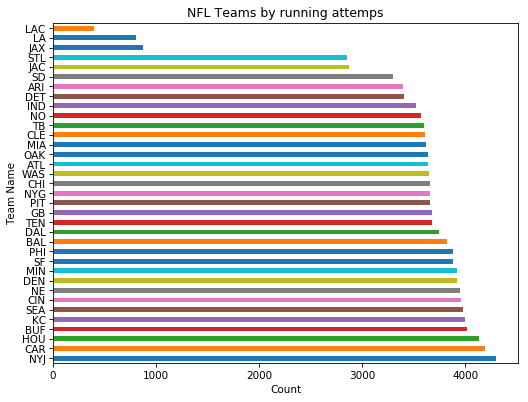

In [12]:
# Running plays distributio by team
running_plays = nfl[nfl['PlayType'] == 'Run']
fig, ax = plt.subplots(figsize=(8, 6), dpi = 75)

f1 = running_plays['posteam'].value_counts().plot(kind='barh')
f1.set(title = "NFL Teams by running attemps", xlabel='Count', ylabel='Team Name')

plt.show()

### Identifying Multiple RB Teams
[Bleacherreport](https://bleacherreport.com/articles/123587-utilizing-multiple-rbs-the-current-trend-in-nfl-examining-the-efficiency)

In [13]:
# match roster RBS
def match(roster):
    #rb_roster = nfl_roster[(nfl_roster['Pos']=='RB') & (nfl_roster['Team']=='DAL')][['name'][0]].values
    rb_roster = nfl_roster[nfl_roster['Pos']=='RB'][['name'][0]].values
    return roster in rb_roster

def carry_df(df):    
    new_df=(df.groupby(by=['Season','GameID','posteam','Rusher'])['RushAttempt'].
                  count().
                  reset_index().
                 rename(columns = {'RushAttempt':'totalRushing'})[['Season','GameID','posteam','Rusher','totalRushing']])
    
    # https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby
    new_df['carr_pct'] = (new_df.groupby(by=['Season','GameID','posteam'])['totalRushing'].transform(lambda x: 100 * x / float(x.sum())))
    workhorse_threshold = 80
    #new_df['workhorse'] = np.where(new_df['carr_pct'] >= workhorse_threshold, 'workhorse', 'support')
    new_df['workhorse'] = np.where(new_df['carr_pct'] > 80, 'workhorse',
                          (np.where(new_df['carr_pct'] > 25, 'support', 'backup')))
    new_df['team_rb_duo'] = np.where(new_df['workhorse'] == 'workhorse','1 RB', 'Multi RB')
    return new_df 

def make_running_df(df):
    new_df = df.copy()
    
    run_df = new_df[new_df['PlayType']=='Run'][\
    ['Season',
     'GameID',
     'posteam',
     'TimeSecs',
     'Rusher',
     'RunLocation',
     'yrdline100',
     'Yards.Gained','RushAttempt',
     'Touchdown']
    ].reset_index(drop=True)
    run_df = run_df[run_df.Rusher.map(match)]
    c_df = carry_df(df)
    
    run_df = run_df.merge(c_df, on=['Season','GameID','posteam','Rusher'],how='left')
    #run_df['carr_pct'] = gb.carr_pct.map(run_df)
    #run_df['carr_pct'] = (run_df.groupby(by=['Season','GameID','posteam'])['RushAttempt'].transform(lambda x: 100 * x / float(x.sum())))
    return run_df

In [14]:
run_df = make_running_df(nfl)
run_df.columns


Index(['Season', 'GameID', 'posteam', 'TimeSecs', 'Rusher', 'RunLocation',
       'yrdline100', 'Yards.Gained', 'RushAttempt', 'Touchdown',
       'totalRushing', 'carr_pct', 'workhorse', 'team_rb_duo'],
      dtype='object')

In [15]:
run_df[run_df['Rusher']=='E.Elliott'].groupby('Season').agg({'Yards.Gained':'sum'})

,Yards.Gained
Season,
2016,1667
2017,989


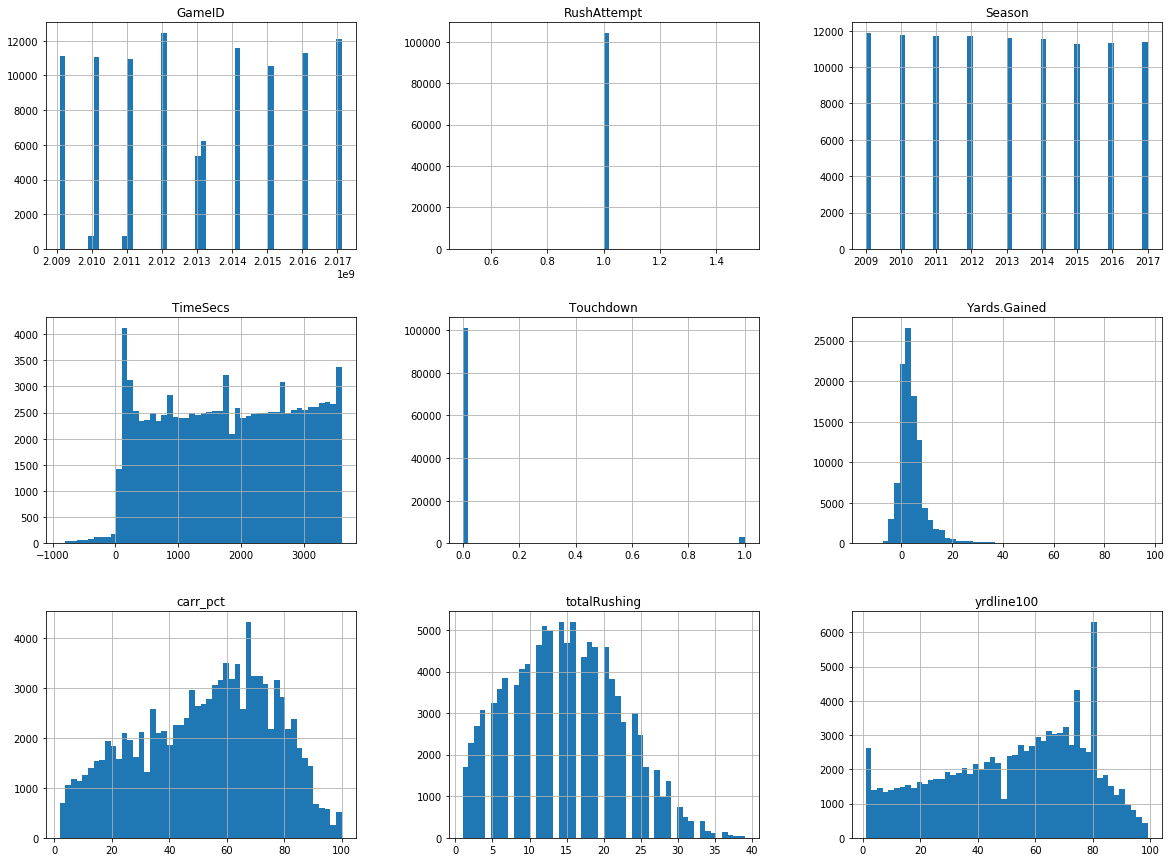

In [16]:
run_df.hist(bins=50, figsize=(20,15))
plt.show()

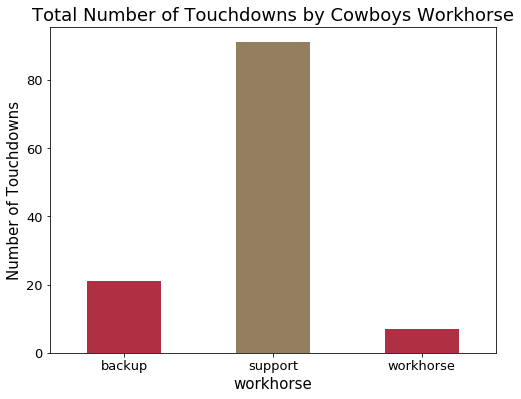

In [17]:
tds = run_df[run_df['posteam']=='NO'].groupby(by=['workhorse']).Touchdown.sum()

fig, ax = plt.subplots(figsize=(8, 6), dpi = 72) # Get access to the figure and axes to modify their attributes later

ax.set_title("Total Number of Touchdowns by Cowboys Workhorse", fontsize = 18) # Chart title
ax.set_xlabel('Rushers', fontsize = 15) # X-axis label
ax.set_ylabel('Number of Touchdowns', fontsize = 15) # Y-axis label
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

mycolors = ['#A6192E', '#85714D'] # Using scarlet and gold colors

tds.plot(kind='bar', alpha = 0.9, rot=0, color = mycolors) # Plot a Bar chart
plt.show()